In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_excel('dataset_quiz.xlsx')

df.head()

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.0,7801.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
1,7214.0,7109.0,8402.0,7903.0,9202.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
2,5911.0,8201.0,8701.0,9101.0,9003.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
3,8402.0,7702.0,8602.0,8903.0,8903.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
4,8201.0,8305.0,5911.0,5903.0,8402.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA


### Mengatasi #N/A

In [2]:
# Mengganti Nilai #N/A dengan nilai 0
df['id_ketua'] = df['id_ketua'].fillna(0)
df['id_anggota1'] = df['id_anggota1'].fillna(0)
df['id_anggota2'] = df['id_anggota2'].fillna(0)
df['id_anggota3'] = df['id_anggota3'].fillna(0)
df['id_anggota4'] = df['id_anggota4'].fillna(0)
df['id_anggota5'] = df['id_anggota5'].fillna(0)

# Cek kolom null
df.isnull().sum()


id_ketua              0
id_anggota1           0
id_anggota2           0
id_anggota3           0
id_anggota4           0
id_anggota5           0
keterlibatan_vltr     0
jml_vltr_terlibat     0
tahun                 0
skema                 0
luaran_hki            0
jenis_luaran_hki      0
potensi_hki           0
luaran_lain           0
jenis_luaran_lain     0
status_luaran_lain    0
dtype: int64

In [3]:
df.head()

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.0,7801.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
1,7214.0,7109.0,8402.0,7903.0,9202.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
2,5911.0,8201.0,8701.0,9101.0,9003.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
3,8402.0,7702.0,8602.0,8903.0,8903.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
4,8201.0,8305.0,5911.0,5903.0,8402.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA


### Visualisasi Data

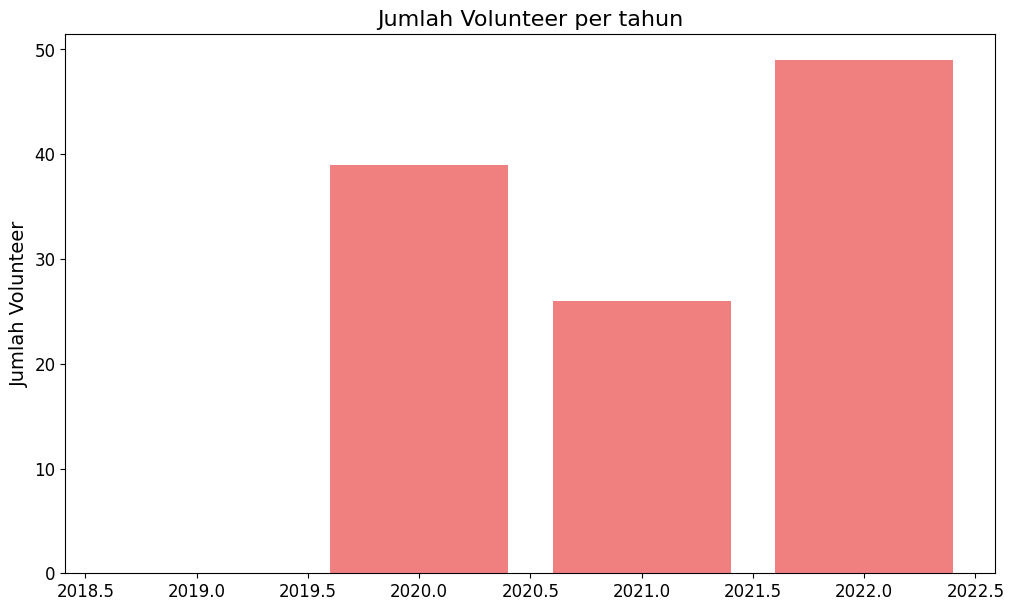

In [4]:
# Menggunakan Bar Plot
%matplotlib inline

tahun1 = df[df['tahun'] == 2019]['jml_vltr_terlibat'].sum()
tahun2 = df[df['tahun'] == 2020]['jml_vltr_terlibat'].sum()
tahun3 = df[df['tahun'] == 2021]['jml_vltr_terlibat'].sum()
tahun4 = df[df['tahun'] == 2022]['jml_vltr_terlibat'].sum()

tahun =[2019, 2020, 2021, 2022]
jml_vltr = [tahun1, tahun2, tahun3, tahun4]

plt.figure(figsize=(12,7))
plt.bar(tahun, jml_vltr, color='lightcoral')

plt.title('Jumlah Volunteer per tahun', size=16)
plt.ylabel('Jumlah Volunteer', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

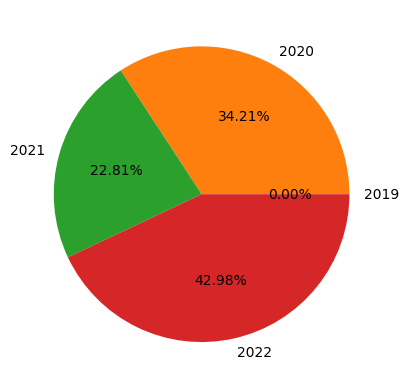

In [5]:
# Menggunakan Pie Chart
y = [tahun1, tahun2, tahun3, tahun4]
mylabels = [2019, 2020, 2021, 2022]

plt.pie(y, labels = mylabels, autopct='%1.2f%%')
plt.show() 


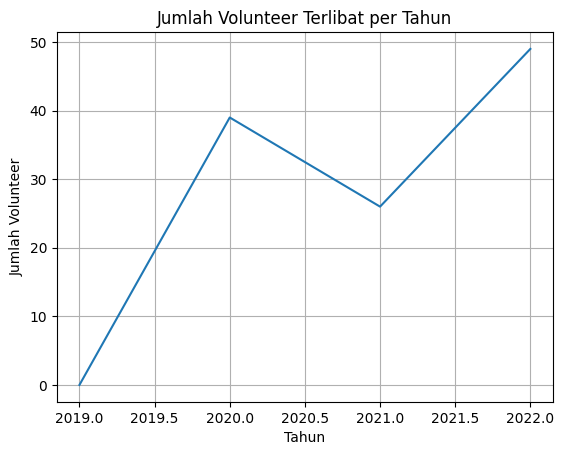

In [7]:
# Menggunakan Line Chart
y = [tahun1, tahun2, tahun3, tahun4]
x = [2019, 2020, 2021, 2022]
plt.plot(x, y)

plt.xlabel('Tahun')
plt.ylabel('Jumlah Volunteer')

plt.title('Jumlah Volunteer Terlibat per Tahun')
plt.grid(True)

plt.show()

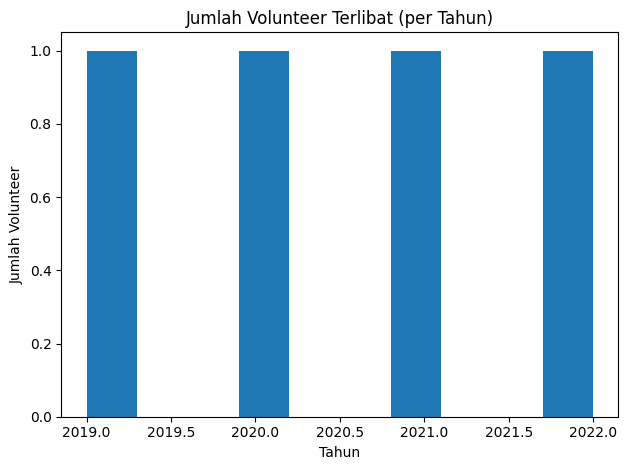

In [6]:
# Menggunakan Histogram
y = [tahun1, tahun2, tahun3, tahun4]
x = [2019, 2020, 2021, 2022]

plt.hist(x, data=y)
plt.xlabel('Tahun')
plt.ylabel('Jumlah Volunteer')
plt.title('Jumlah Volunteer Terlibat (per Tahun)')
plt.tight_layout()
plt.show()

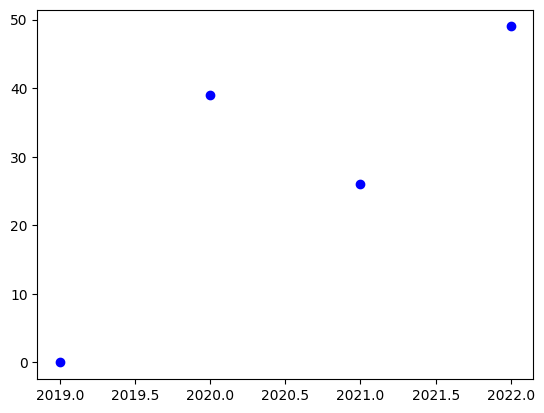

In [7]:
# Menggunakan Scatter Plot
y = [tahun1, tahun2, tahun3, tahun4]
x = [2019, 2020, 2021, 2022]
plt.scatter(x, y, color = 'blue')

plt.show()

In [8]:
# cek nama kolom
df.columns

Index(['id_ketua', 'id_anggota1', 'id_anggota2', 'id_anggota3', 'id_anggota4',
       'id_anggota5', 'keterlibatan_vltr', 'jml_vltr_terlibat', 'tahun',
       'skema', 'luaran_hki', 'jenis_luaran_hki', 'potensi_hki', 'luaran_lain',
       'jenis_luaran_lain', 'status_luaran_lain'],
      dtype='object')

In [9]:
# Cek kolom null
df.isnull().sum()

id_ketua              0
id_anggota1           0
id_anggota2           0
id_anggota3           0
id_anggota4           0
id_anggota5           0
keterlibatan_vltr     0
jml_vltr_terlibat     0
tahun                 0
skema                 0
luaran_hki            0
jenis_luaran_hki      0
potensi_hki           0
luaran_lain           0
jenis_luaran_lain     0
status_luaran_lain    0
dtype: int64

In [10]:
# Cek kelengkapan data
print(df.info())
print('\n')

# cek statistik deskriptif
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_ketua            85 non-null     float64
 1   id_anggota1         85 non-null     float64
 2   id_anggota2         85 non-null     float64
 3   id_anggota3         85 non-null     float64
 4   id_anggota4         85 non-null     float64
 5   id_anggota5         85 non-null     float64
 6   keterlibatan_vltr   85 non-null     object 
 7   jml_vltr_terlibat   85 non-null     int64  
 8   tahun               85 non-null     int64  
 9   skema               85 non-null     object 
 10  luaran_hki          85 non-null     object 
 11  jenis_luaran_hki    85 non-null     object 
 12  potensi_hki         85 non-null     object 
 13  luaran_lain         85 non-null     object 
 14  jenis_luaran_lain   85 non-null     object 
 15  status_luaran_lain  85 non-null     object 
dtypes: float64

### Seleksi Fitur

In [58]:
# Seleksi fitur
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in df.columns:
    df[column] = le.fit_transform(df[column])
    
    X = df.drop(["jml_vltr_terlibat"], axis=1)
    
    y = df['tahun']


### Data Training dan Testing

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Metode Klasifikasi

#### a. Decision Tree

In [83]:
from sklearn.tree import DecisionTreeClassifier # import DT
from sklearn.ensemble import RandomForestClassifier # import RandomForest

dt = DecisionTreeClassifier()

# Sesuaikan dt ke set training
dt.fit(X_train, y_train)



DecisionTreeClassifier()

In [84]:
# Memprediksi label set test
y_pred_dt = dt.predict(X_test)

# Menghitung sek accuracy
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Test set accuracy: {:.2f}".format(acc_dt))
print(f"Test set accuracy: {acc_dt}")

Test set accuracy: 1.00
Test set accuracy: 1.0


#### b. RandomForest

In [81]:
from sklearn.ensemble import RandomForestClassifier # import RandomForest
rf = RandomForestClassifier(max_features=5, n_estimators=500)

# Sesuaikan dt ke set training
rf.fit(X_train, y_train)



RandomForestClassifier(max_features=5, n_estimators=500)

In [82]:
# Memprediksi label set test
y_pred_rf = rf.predict(X_test)

# Menghitung set accuracy
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Test set accuracy: {:.2f}".format(acc_rf))
print(f"Test set accuracy: {acc_rf}")

Test set accuracy: 0.94
Test set accuracy: 0.9411764705882353


#### Perbandingan Akurasi

In [62]:
from sklearn.ensemble import VotingClassifier # import model Voting

In [63]:
clf1 = DecisionTreeClassifier()
clf2 = RandomForestClassifier(n_estimators=10, random_state=1)


# model hard voting
voting = VotingClassifier(estimators=[('DecisionTreeClassif', clf1), ('RandomForestClassifier', clf2)], voting='hard')

# Fit model
voting.fit(X_train, y_train)

# Prediksi
y_pred_vt1 = voting.predict(X_test)

# Evaluasi akurasi testing data
acc_vt1 = accuracy_score(y_test, y_pred_vt1)

# Print hasil evaluasi
print('Voting Hard')
print("Test set accuracy: {:.2f}".format(acc_vt1))
print(f"Test set accuracy: {acc_vt1}")

Voting Hard
Test set accuracy: 1.00
Test set accuracy: 1.0


### Confusion Matrix dan ROC

In [64]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
# Random Forest
y_preds = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)

y_proba = y_proba[:,1].reshape((y_proba.shape[0],))

y_proba[:5], y_preds[:5], y_test[:5]

C:\Users\HP\AppData\Local\Temp\ipykernel_7008\3455483496.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_proba[:5], y_preds[:5], y_test[:5]


(array([0.158, 0.258, 0.056, 0.208, 0.202]),
 array([0, 0, 3, 2, 2], dtype=int64),
 2     0
 13    0
 63    3
 41    2
 48    2
 Name: tahun, dtype: int64)

In [65]:
from sklearn import metrics
conf = metrics.confusion_matrix(y_test, y_preds)
conf

array([[5, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 4, 1],
       [0, 0, 0, 3]], dtype=int64)

In [66]:
def get_confusion_matrix(y_true, y_pred):
    n_classes = len(np.unique(y_true))
    conf = np.zeros((n_classes, n_classes))
    for actual, pred in zip(y_true, y_pred):
        conf[int(actual)][int(pred)] += 1
    return conf.astype('int')

Text(0.5, 23.38159722222222, 'Predicted label')

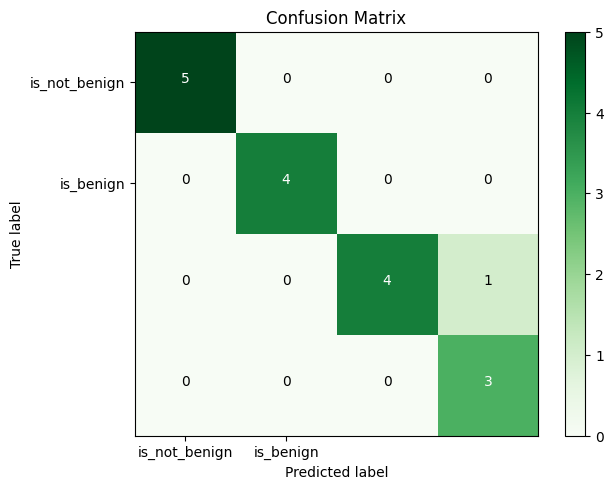

In [67]:
import itertools

classes = ['is_not_benign', 'is_benign']

plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [85]:
def get_roc_curve(y_test, y_proba, delta):

    thresh = list(np.arange(0, 1, delta)) + [1]
    TPRs = []
    FPRs = []
    y_pred = np.empty(y_proba.shape)
    for th in thresh:
        y_pred[y_proba < th] = 0
        y_pred[y_proba >= th] = 1
        
        
        (TN, FP) = get_confusion_matrix(y_test, y_pred)
        (FN, TP) = get_confusion_matrix(y_test, y_pred)
        
        TPR = TP / (TP + FN)  # sensitivity
        FPR = FP / (FP + TN)  # 1 - specificity
        TPRs.append(TPR)
        FPRs.append(FPR)
    return FPRs, TPRs, thresh

In [ ]:
delta = 0.001
FPRs, TPRs, _ = get_roc_curve(y_test, y_proba, delta)

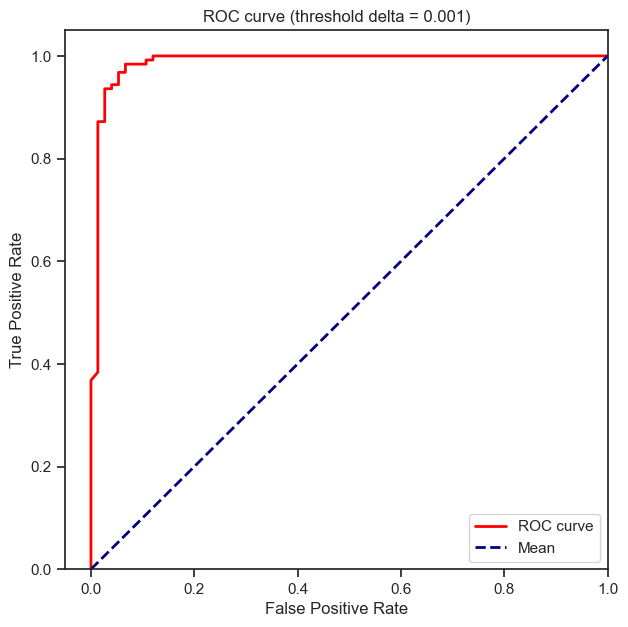

In [ ]:

plt.plot(FPRs, TPRs, color='red',
         lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Mean")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC curve (threshold delta = {delta})')
plt.legend(loc="lower right")
plt.show()

### Hyperparameter Tunning 

##### a. Menggunakan GridSearchCV

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

# inisiasi repated k-fold
cv = RepeatedKFold(n_splits=4, n_repeats=3, random_state=42)

params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': list(range(5,11))
}

# inisiasi grid berdasarkan nilai repeated k-fold dan hyperparameter
grid = GridSearchCV(dt, param_grid=params, cv=cv)

# Fit / latih berdasarkan grid
# %timeit merupakan magic command didalam ipython notebook
# yang dapat kita gunkan untuk menghitung waktu komputasi
# cara ini cukup efektif untuk melakukan evaluasi suatu algoritma atau prosedur
%timeit grid.fit(X,y)

# Evaluasi dengan score
score = grid.score(X,y)

print(f'Hasil evaluasi: {score}')
print(f'Konfigurasi hyperparameter: {grid.best_params_}')


1.58 s ± 163 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Hasil evaluasi: 1.0
Konfigurasi hyperparameter: {'criterion': 'gini', 'max_depth': 5}


##### b. Menggunakan Random Search

In [78]:
from sklearn.model_selection import RandomizedSearchCV

# Definisikan hyperparameter yang akan digunakan
# sklearn menerima dalam bentuk dictionary
# nama hyperparameter HARUS SESUAI dengan dokumentasi sklearn
params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': list(range(5,11))
}

# inisiasi grid berdasarkan nilai repeated k-fold dan hyperparameter
random = RandomizedSearchCV(dt, params, cv=cv)

# Fit / latih berdasarkan grid
# %timeit merupakan magic command didalam ipython notebook
# yang dapat kita gunakan untuk menghitung waktu komputasi
# cara ini cukup efektif untuk melakukan evaluasi suatu algoritma atau prosedur
%timeit random.fit(X,y)

# Evaluasi dengan score
score = random.score(X,y)

print(f'Hasil evaluasi: {score}')
print(f'Konfigurasi hyperparameter: {random.best_params_}')

791 ms ± 139 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Hasil evaluasi: 1.0
Konfigurasi hyperparameter: {'max_depth': 10, 'criterion': 'log_loss'}


##### c. Menggunakan Exhausive Search

In [ ]:
# from sklearn.model_selection import 

# # Definisikan hyperparameter yang akan digunakan
# # sklearn menerima dalam bentuk dictionary
# # nama hyperparameter HARUS SESUAI dengan dokumentasi sklearn
# params = {
#     'criterion': ['gini', 'entropy', 'log_loss'],
#     'max_depth': list(range(5,11))
# }

# # inisiasi grid berdasarkan nilai repeated k-fold dan hyperparameter
# random = RandomizedSearchCV(dt, params, cv=cv)

# # Fit / latih berdasarkan grid
# # %timeit merupakan magic command didalam ipython notebook
# # yang dapat kita gunakan untuk menghitung waktu komputasi
# # cara ini cukup efektif untuk melakukan evaluasi suatu algoritma atau prosedur
# %timeit random.fit(X,y)

# # Evaluasi dengan score
# score = random.score(X,y)

# print(f'Hasil evaluasi: {score}')
# print(f'Konfigurasi hyperparameter: {random.best_params_}')

### Visualisasi Hasil Klasifikasi

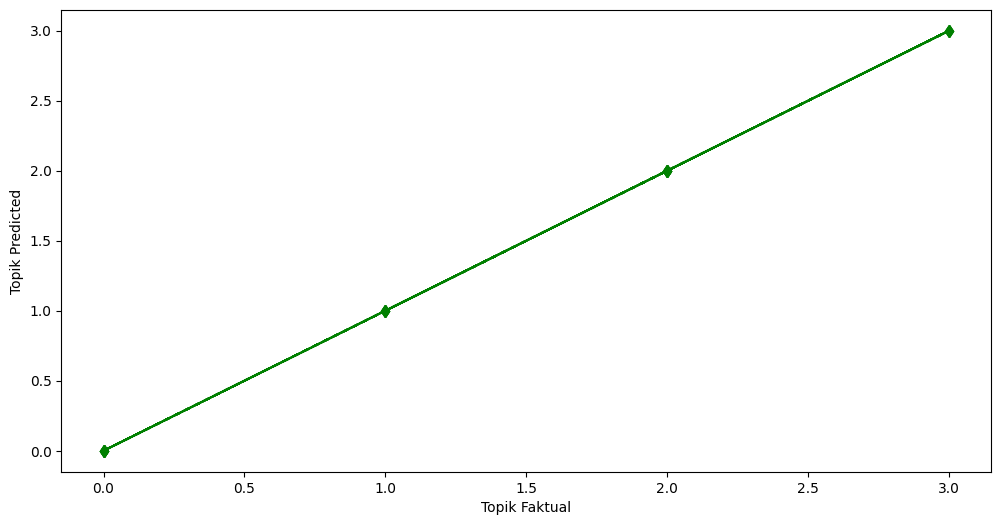

In [79]:
#line plot pada decision Tree

plt.figure(figsize=(12,6))
plt.plot(y_test, y_pred_dt,'g--d')
plt.xlabel("Topik Faktual")
plt.ylabel("Topik Predicted")
plt.show()

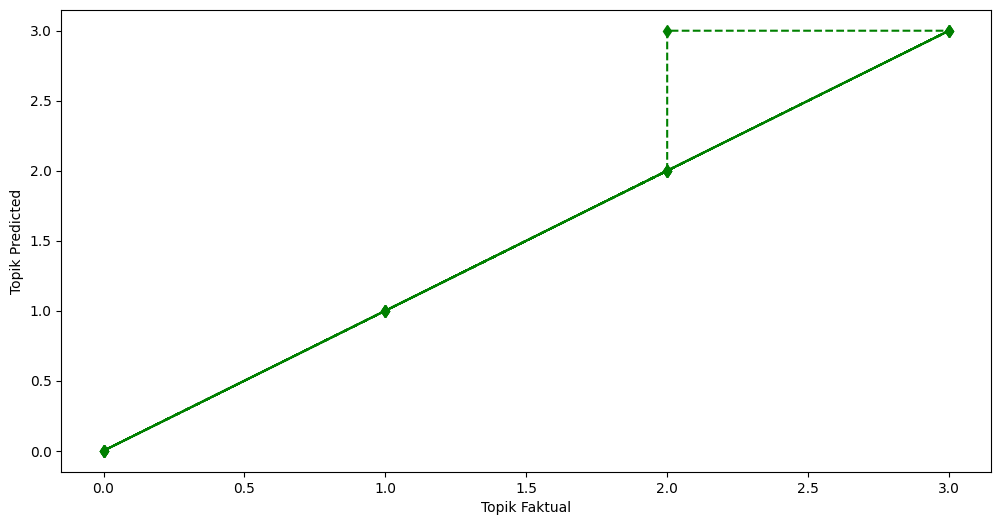

In [80]:
#line plot pada RandomForest

plt.figure(figsize=(12,6))
plt.plot(y_test, y_pred_rf,'g--d')
plt.xlabel("Topik Faktual")
plt.ylabel("Topik Predicted")
plt.show()